### Problem 2 (K-means clustering)

### a

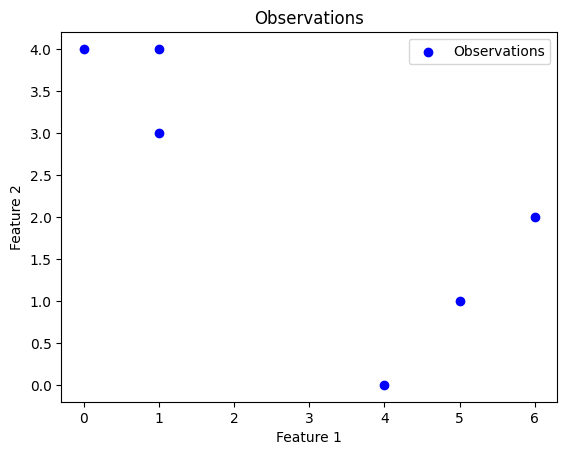

In [1]:
import matplotlib.pyplot as plt
import numpy as np

X = np.array([[1, 4],
              [1, 3],
              [0, 4],
              [5, 1],
              [6, 2],
              [4, 0]])

x_coords = X[:, 0]
y_coords = X[:, 1]


plt.scatter(x_coords, y_coords, c='blue', label='Observations')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Observations')
plt.legend()
plt.show()

### b

In [2]:
np.random.seed(42)

K = 2

cluster_labels = np.random.choice(K, size=X.shape[0])

for i, label in enumerate(cluster_labels):
    print(f'Observation {i+1}: Cluster {label + 1}')

Observation 1: Cluster 1
Observation 2: Cluster 2
Observation 3: Cluster 1
Observation 4: Cluster 1
Observation 5: Cluster 1
Observation 6: Cluster 2


### c

In [3]:
def compute_centroids(X, cluster_labels, K):
    centroids = np.zeros((K, X.shape[1]))
    for k in range(K):
        cluster_points = X[cluster_labels == k]
        centroids[k] = np.mean(cluster_points, axis=0)
    return centroids


initial_centroids = compute_centroids(X, cluster_labels, K)

for k, centroid in enumerate(initial_centroids):
    print(f'Centroid for Cluster {k + 1}: {centroid}')

Centroid for Cluster 1: [3.   2.75]
Centroid for Cluster 2: [2.5 1.5]


In [4]:
def assign_to_closest_centroid(X, centroids):
    cluster_labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - centroids, axis=2), axis=1)
    return cluster_labels


updated_cluster_labels = assign_to_closest_centroid(X, initial_centroids)


for i, label in enumerate(updated_cluster_labels):
    print(f'Observation {i+1}: Cluster {label + 1}')

Observation 1: Cluster 1
Observation 2: Cluster 1
Observation 3: Cluster 1
Observation 4: Cluster 2
Observation 5: Cluster 1
Observation 6: Cluster 2


### e

In [5]:
max_iterations = 100

cluster_labels = np.random.choice(K, size=X.shape[0])


centroids = compute_centroids(X, cluster_labels, K)

for iteration in range(max_iterations):

    updated_cluster_labels = assign_to_closest_centroid(X, centroids)

    if np.array_equal(updated_cluster_labels, cluster_labels):
        print(f'Converged after {iteration + 1} iterations.')
        break

    centroids = compute_centroids(X, updated_cluster_labels, K)
    cluster_labels = updated_cluster_labels

for i, label in enumerate(cluster_labels):
    print(f'Observation {i + 1}: Cluster {label + 1}')

Converged after 2 iterations.
Observation 1: Cluster 1
Observation 2: Cluster 1
Observation 3: Cluster 1
Observation 4: Cluster 2
Observation 5: Cluster 2
Observation 6: Cluster 2


### f

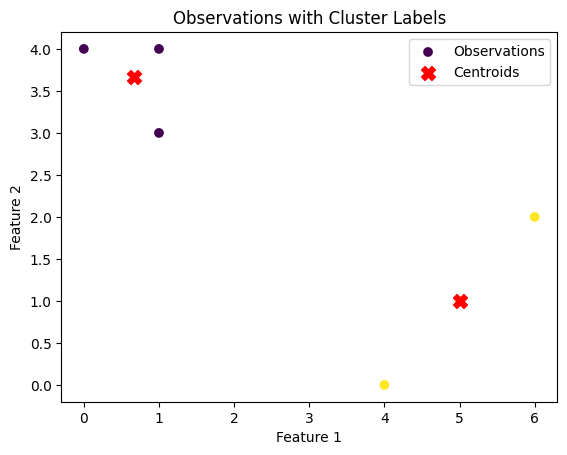

In [6]:
plt.scatter(x_coords, y_coords, c=cluster_labels, cmap='viridis', label='Observations')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100, label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Observations with Cluster Labels')
plt.legend()
plt.show()

### Problem 3 (PCA on Olivetti faces)

### a

In [7]:
from sklearn.datasets import fetch_olivetti_faces

faces_data = fetch_olivetti_faces(shuffle=True, random_state=42)
X_faces = faces_data.data
y_faces = faces_data.target

### b

In [8]:
mean_face = X_faces.mean(axis=0)
X_faces_demeaned = X_faces - mean_face

### c

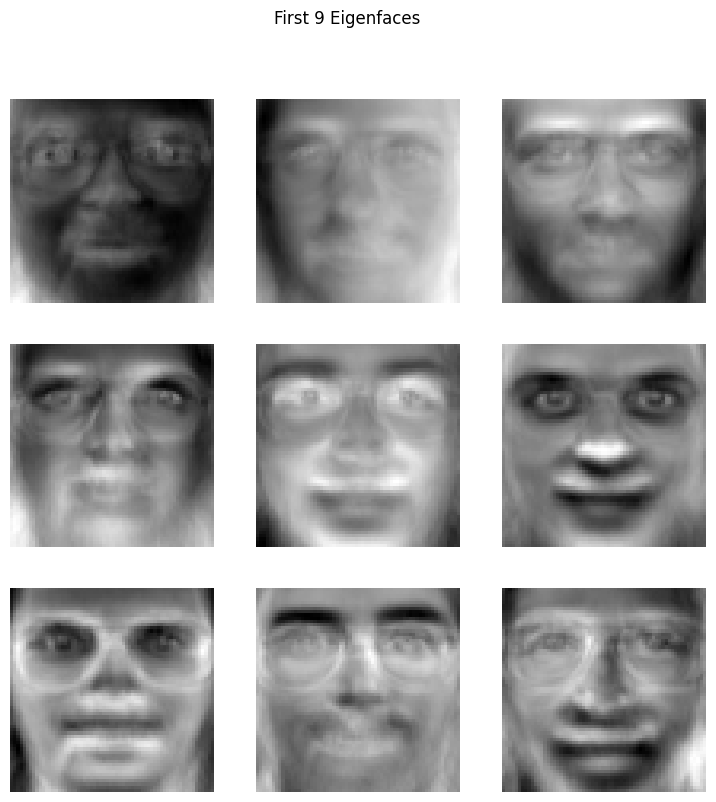

In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


n_components = 9
pca = PCA(n_components=n_components)
pca.fit(X_faces_demeaned)

fig, axes = plt.subplots(3, 3, figsize=(9, 9))
for i, ax in enumerate(axes.flat):
    eigenface = pca.components_[i].reshape(faces_data.images.shape[1], faces_data.images.shape[2])
    ax.imshow(eigenface, cmap='gray')
    ax.axis('off')
plt.suptitle('First 9 Eigenfaces')
plt.show()

### d

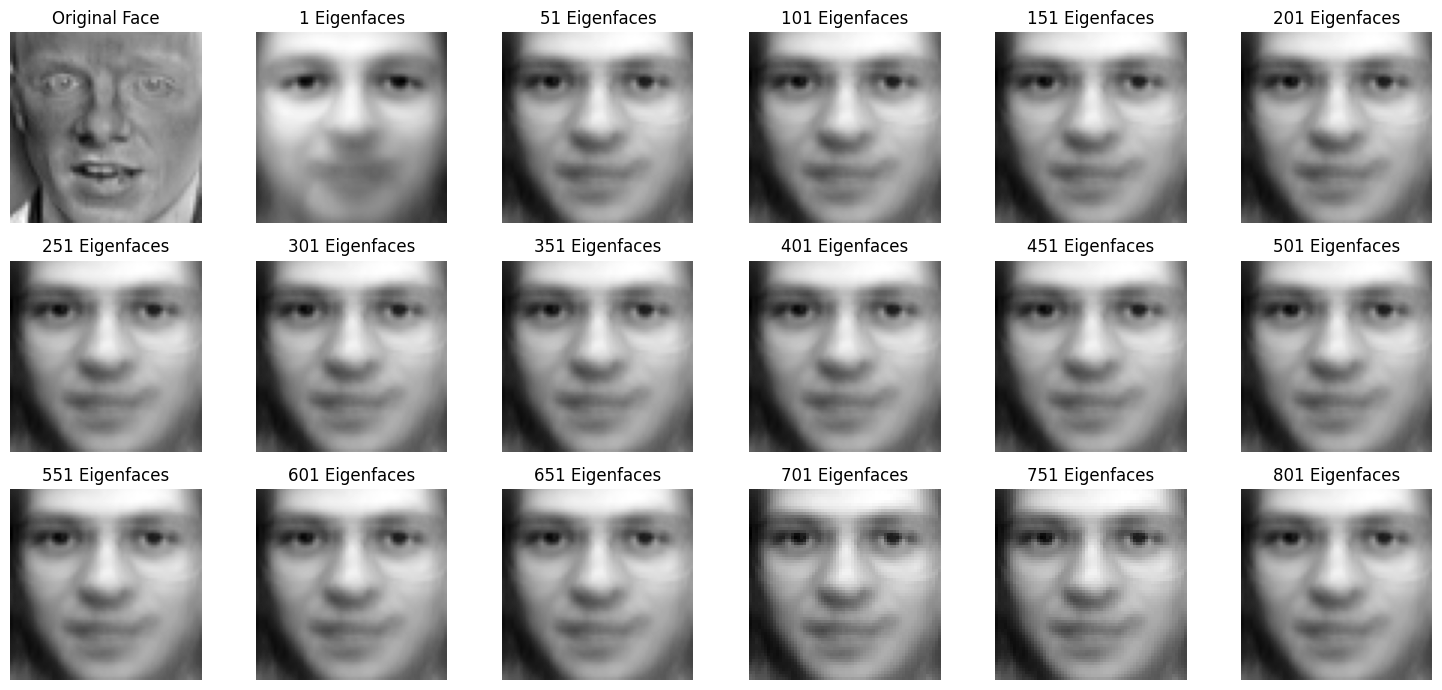

In [10]:
chosen_face = X_faces_demeaned[0]
max_num_eigenfaces = 801  
num_combined_eigenfaces = [1 + 50 * n for n in range(max_num_eigenfaces // 50 + 1)]
num_rows = 3  
num_cols = (len(num_combined_eigenfaces) + 1) // num_rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 7))

axes[0, 0].imshow(chosen_face.reshape(64, 64), cmap='gray')
axes[0, 0].set_title('Original Face')
axes[0, 0].axis('off')

for i, num_eigenface in enumerate(num_combined_eigenfaces):
    row_idx = (i + 1) // num_cols
    col_idx = (i + 1) % num_cols
  
    reconstructed_face = mean_face + np.dot(pca.components_[:num_eigenface, :].T, pca.transform(chosen_face.reshape(1, -1)).flatten()[:num_eigenface])
    axes[row_idx, col_idx].imshow(reconstructed_face.reshape(64, 64), cmap='gray')
    axes[row_idx, col_idx].set_title(f'{num_eigenface} Eigenfaces')
    axes[row_idx, col_idx].axis('off')

plt.tight_layout()
plt.show()